In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import pylab
from pylab import figure, subplot, text, xlim, ylim, title, plot, axvline, ylabel, xlabel, legend
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, describe, spearmanr
import scipy.stats as stats
import statsmodels.api as sm
import pylab as py

In [26]:
orig_params = pylab.rcParams.copy()
params = {'legend.fontsize': '20',
          'figure.figsize': (15, 10),
          'axes.labelsize': '20',
          'axes.titlesize':'25',
          'xtick.labelsize':'20',
          'ytick.labelsize':'20',
          'axes.linewidth': '0.5',
          'pdf.fonttype': '42',
          'font.sans-serif': 'Helvetica'}
pylab.rcParams.update(params)
pylab.style.use('seaborn-white')

### Read in simulated data

In [53]:
#PARAM VALS FOR THIS RUN
sim_file_use = 'simulated_data_for_figures_fig2_and_3_medians_20k_30min_poisson_decay_SAMPLES_OVER_TIME.csv'
num_sampling_times = 48
num_cells = 20e3

updated_df = pd.read_csv(sim_file_use)
updated_df['unspliced_Target'] = updated_df['unspliced_unlabeled_Target']+updated_df['unspliced_labeled_Target']
updated_df['unspliced_TF'] = updated_df['unspliced_unlabeled_TF']+updated_df['unspliced_labeled_TF']

updated_df['labeled_Target'] = updated_df['unspliced_labeled_Target']+updated_df['spliced_labeled_Target']
updated_df['labeled_TF'] = updated_df['unspliced_labeled_TF']+updated_df['spliced_labeled_TF']

updated_df['unlabeled_Target'] = updated_df['unspliced_unlabeled_Target']+updated_df['spliced_unlabeled_Target']
updated_df['unlabeled_TF'] = updated_df['unspliced_unlabeled_TF']+updated_df['spliced_unlabeled_TF']

updated_df

Unnamed: 0  TF_is_bursting  Target_is_bursting  TF_protein_1K  \
0                0           False               False     108.436001   
1                1           False               False     104.767832   
2                2           False               False      68.321897   
3                3           False               False      98.929813   
4                4           False               False      92.201256   
...            ...             ...                 ...            ...   
979995      979995           False               False     125.286343   
979996      979996           False               False      91.786033   
979997      979997           False               False      56.246888   
979998      979998           False               False      68.412191   
979999      979999           False               False      62.134594   

        spliced_labeled_Target  spliced_labeled_TF  spliced_unlabeled_Target  \
0                 0.000000e+00        0.000000e+00                 90.656870   
1                 0.000000e+00        0.000000e+00                 56.547752   
2                 0.000000e+00        0.000000e+00                 28.130869   
3                 0.000000e+00        0.000000e+00                 56.266619   
4                 0.000000e+00        0.000000e+00                151.481026   
...                        ...                 ...                       ...   
979995            0.000000e+00        0.000000e+00                117.070828   
979996            0.000000e+00        0.000000e+00                 59.887099   
979997            1.037199e-42        3.747264e-28                  1.788690   
979998            3.881565e-55        0.000000e+00                 36.392012   
979999            7.333333e-01        2.564496e-27                 42.889852   

        spliced_unlabeled_TF  unspliced_labeled_Target  unspliced_labeled_TF  \
0                  20.399468              0.000000e+00          0.000000e+00   
1                  78.200000              0.000000e+00          0.000000e+00   
2                  30.399298              0.000000e+00          0.000000e+00   
3                  67.275356              0.000000e+00          0.000000e+00   
4                  28.390652              0.000000e+00          0.000000e+00   
...                      ...                       ...                   ...   
979995             72.839987              0.000000e+00          0.000000e+00   
979996             88.087555              0.000000e+00          0.000000e+00   
979997             10.800000              1.712425e-64          8.519737e-63   
979998             23.201892              1.789704e-62          0.000000e+00   
979999             13.129518              5.914119e-62          2.810067e-62   

        ...  total_TF_mRNA  total_Target_mRNA  sampling_time  new_Target_mRNA  \
0       ...      20.399468          91.666667              0         0.000000   
1       ...      80.200000          56.733333              0         0.000000   
2       ...      30.400000          28.130871              0         0.000000   
3       ...      67.308123          56.266667              0         0.000000   
4       ...      28.390652         151.587034              0         0.000000   
...     ...            ...                ...            ...              ...   
979995  ...      72.840000         122.460645           1440        82.133333   
979996  ...      88.817870          63.400000           1440        20.533333   
979997  ...      10.800000           1.788690           1440         0.000000   
979998  ...      23.201892          36.392013           1440         0.000000   
979999  ...      13.129518          59.312424           1440        41.066667   

        total TF mRNA decile  unspliced_TF  labeled_Target    labeled_TF  \
0                          4  1.781259e-09    0.000000e+00  0.000000e+00   
1                          9  3.460384e-08    0.000000e+00  0.000000e+00   
2       

## Figure S1

### Fig S1A

73.44926612221175 42.775075


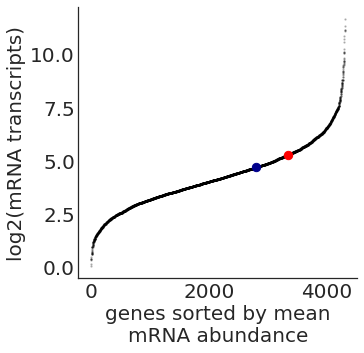

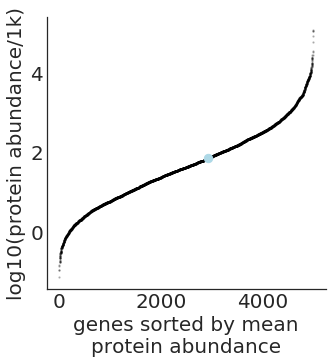

(0.6498027384543977, 0.586, 0.7774425620793688)

In [7]:
df_use_S1 = updated_df

sim_data_TF_t0 = df_use_S1[df_use_S1['sampling_time']==0]['total_TF_mRNA'][::200]
sim_data_Target_t0 = df_use_S1[df_use_S1['sampling_time']==0]['total_Target_mRNA']
sim_data_TF_PROT_t0 = [i for i in df_use_S1[df_use_S1['sampling_time']==0]['TF_protein_1K']]

#data from Schwanhausser et al
nature_2011 = pd.read_excel('parameters_extraction/41586_2011_BFnature10098_MOESM304_ESM.xls')
real_PROT = [i for i in nature_2011['Protein copy number average [molecules/cell]']]
real_RNA = nature_2011['mRNA copy number average [molecules/cell]']

print(np.median(sim_data_TF_PROT_t0),np.median([i/1000 for i in real_PROT]))

plt.figure(figsize=(5,5))
plt.scatter(np.arange(0,4309),sorted(np.log2(real_RNA.dropna())),color='black',alpha=0.2,s=2)
plt.scatter(2800,np.log2(np.median(sim_data_TF_t0)),color='darkblue',s=70)
plt.scatter(3350,np.log2(np.median(sim_data_Target_t0)),color='red',s=70)
plt.xlabel("genes sorted by mean\nmRNA abundance")
plt.ylabel("log2(mRNA transcripts)")
sns.despine()
plt.show()

plt.figure(figsize=(5,5))
plt.scatter(np.arange(0,5000),sorted([np.log10(i/1000) for i in real_PROT]),color='black',alpha=0.2,s=2)
plt.scatter(2930,np.median(np.log10(sim_data_TF_PROT_t0)),color='lightblue',s=70)
plt.xlabel("genes sorted by mean\nprotein abundance")
plt.ylabel("log10(protein abundance/1k)")
sns.despine()
plt.show()

#what percentile of genes are represented by the simulated genes
#TF MRNA, TF PROTEIN, TARGET MRNA
2800/4309, 2930/5000, 3350/4309

### Fig S1C (steady-state distributions)

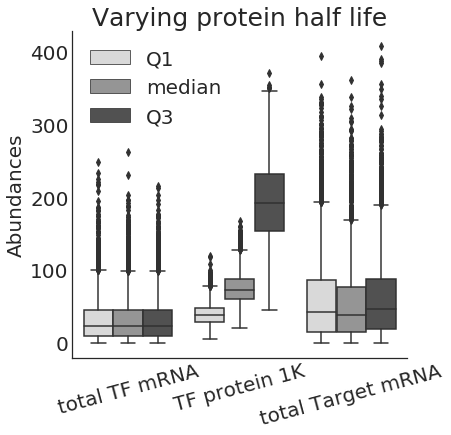

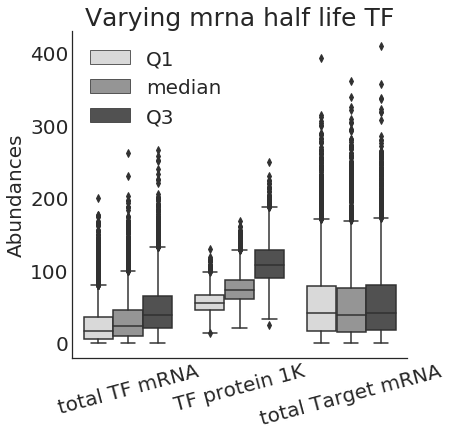

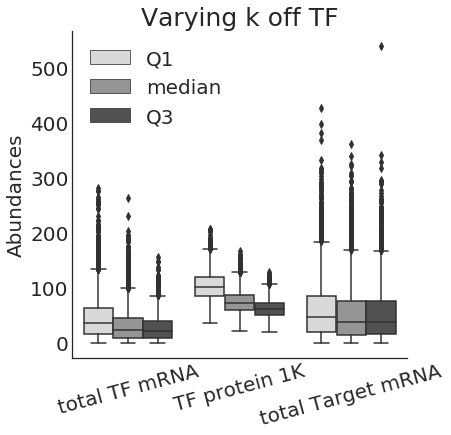

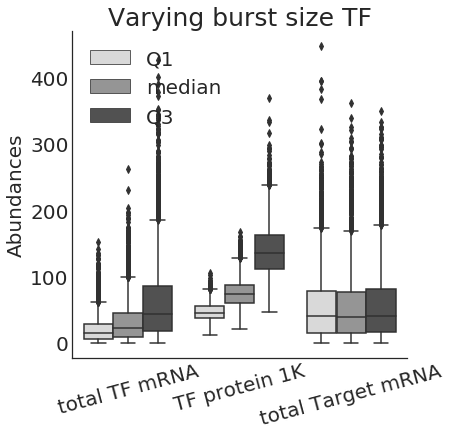

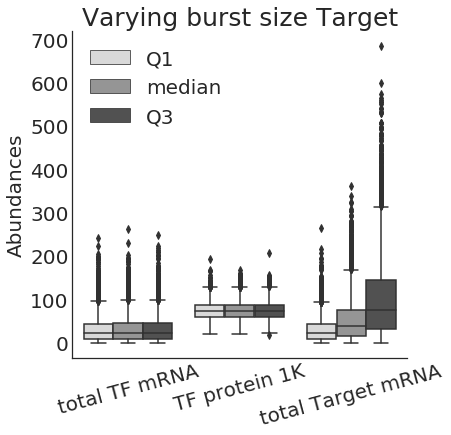

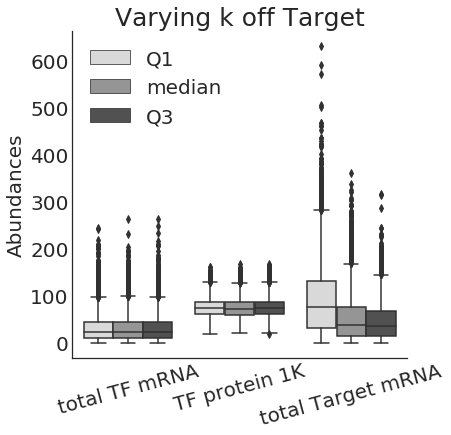

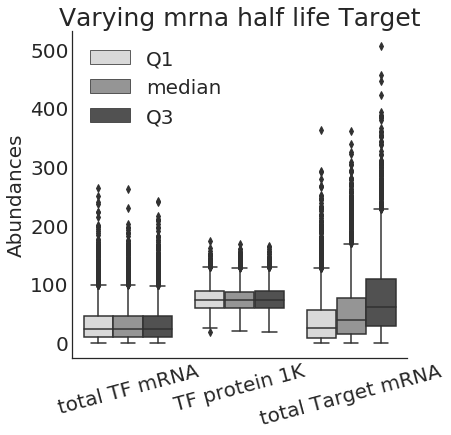

In [23]:
#combine DFs with appropriate values, from each quartile

for param in ["protein_half_life", "mrna_half_life_TF", "protein_production_rate",
              "k_on_TF", "k_off_TF", "burst_size_TF", "burst_size_Target", "k_on_Target",
              "k_off_Target", "mrna_half_life_Target"]:
    full_param_df = pd.DataFrame()

    for quartile in ['Q1','med','Q3']:
        steady_state_distribs_file = "STEADY_STATE_DISTRIB_5k_cells_"+param+"_"+quartile+".csv" #vs 1k_cells
        this_quartile_df = pd.read_csv("simulated_data_for_figures/figS1/"+steady_state_distribs_file)
        S2_num_cells = len(this_quartile_df)
        this_quartile_df = pd.DataFrame(pd.concat([this_quartile_df['total_TF_mRNA'],
                                      this_quartile_df['TF_protein_1K'],
                                      this_quartile_df['total_Target_mRNA']]))
        full_param_df = pd.concat([full_param_df, this_quartile_df])
    
    full_param_df['entity'] = np.reshape((['total TF mRNA']*S2_num_cells + ['TF protein 1K']*S2_num_cells + ['total Target mRNA']*S2_num_cells)*3, -1, 1)
    full_param_df['quartile'] = np.reshape(['Q1']*S2_num_cells*3+['median']*S2_num_cells*3+['Q3']*S2_num_cells*3,-1,1)
    
    plt.figure(figsize=(6,6))
    plt.title("Varying "+ " ".join(param.split("_")), fontsize=25)
    plt.xlabel("Entity", fontsize=20)
    sns.boxplot(data=full_param_df, x='entity', y=0, hue='quartile', palette="Greys")
    plt.xticks(rotation=15)
    plt.xlabel("")
    plt.ylabel("Abundances")
    sns.despine()
    plt.legend(loc='upper left')
    plt.show()

## Figure 2

### Fig 2B (single cell over time)

15


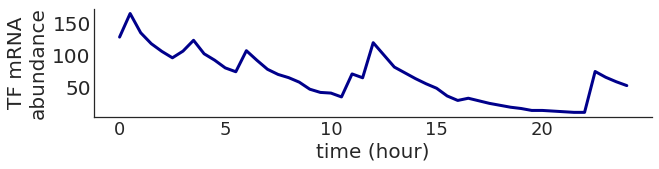

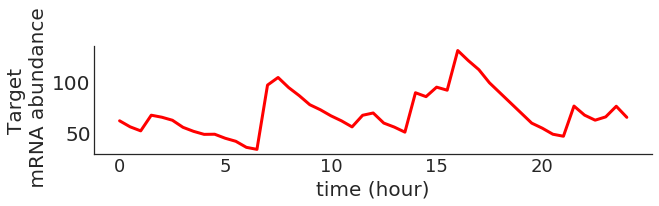

47


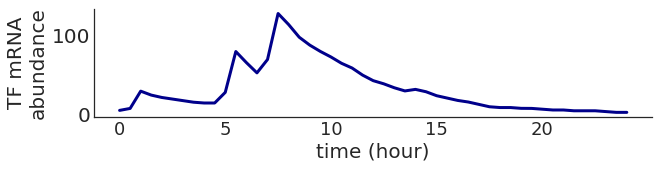

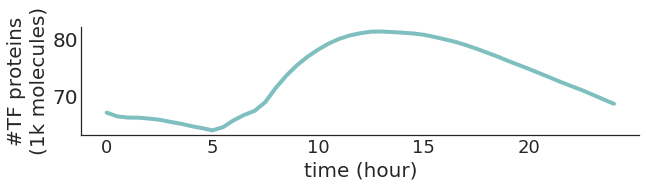

49
87
163
164
170


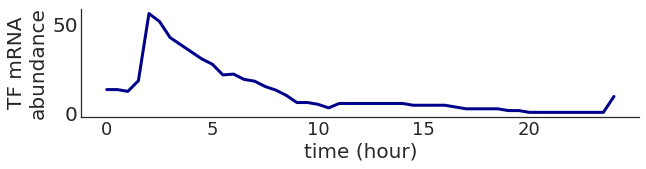

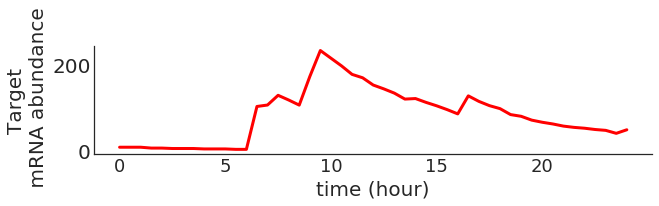

176


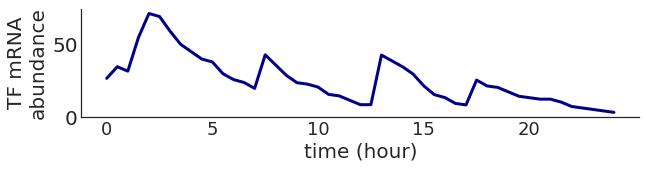

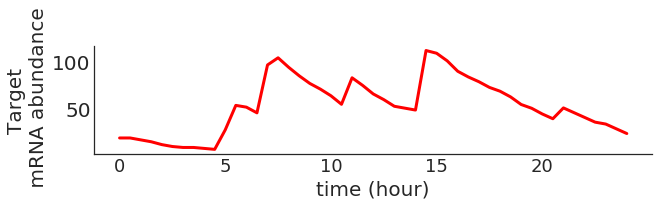

In [24]:
#tracking the same cell over time (Fig 1B)

random_cells_check = [176,170,15,47]
for i in random_cells_check:
    print(i)
    rows_keep = list(np.arange(i,len(updated_df),20e3))
    single_cell_over_time = updated_df.loc[rows_keep,['TF_is_bursting','Target_is_bursting','total_TF_mRNA','TF_protein_1K','total_Target_mRNA','sampling_time']]

    #TF mRNA
    f2b_TFRNA = plt.figure(figsize=(10,2))
    plt.plot(single_cell_over_time['sampling_time'], single_cell_over_time['total_TF_mRNA'],color='darkblue',linewidth=3)
    plt.ylabel("TF mRNA\nabundance")
    plt.xticks(np.arange(0,1500,300),np.arange(0,25,5),fontsize=18)
    plt.xlabel("time (hour)")
    sns.despine()
    plt.show()

    #TF protein
    f2b_TFprot = plt.figure(figsize=(10,2))
    plt.plot(single_cell_over_time['sampling_time'], single_cell_over_time['TF_protein_1K'],
             color='teal',linewidth=4,alpha=0.5)
    plt.ylabel("#TF proteins\n(1k molecules)")
    plt.xticks(np.arange(0,1500,300),np.arange(0,25,5),fontsize=18)
    plt.xlabel("time (hour)")
    sns.despine()
    plt.show()

    #Target mRNA
    f2b_TargetRNA = plt.figure(figsize=(10,2))
    plt.plot(single_cell_over_time['sampling_time'], single_cell_over_time['total_Target_mRNA'],color='red',linewidth=3)
    plt.ylabel("Target\n mRNA abundance")
    plt.xticks(np.arange(0,1500,300),np.arange(0,25,5),fontsize=18)
    plt.xlabel("time (hour)")
    sns.despine()
    plt.show()

### Fig 2C (steady-state distributions)

In [30]:
plt.figure(figsize=(8,10))
for t in [0]:
    med_df_t0 = updated_df[updated_df['sampling_time']==t]
    sns.distplot(med_df_t0['total_Target_mRNA'],color='Red',
                 bins=100,hist=False,kde=True,
                 kde_kws={"color": "Red", "lw": 7})
    sns.distplot(med_df_t0['total_TF_mRNA'],color='DarkBlue',
                 bins=100,hist=False,kde=True,
                 kde_kws={"color": "DarkBlue", "lw": 7})
    sns.distplot(med_df_t0['TF_protein_1K'], color='#6FCAC9',
                 bins=100,hist=False,kde=True,
                 kde_kws={"lw": 7})
    sns.despine()
    plt.xlabel("abundance")
    plt.ylabel("density\n(fraction of cells)")
    plt.xlim(0,270)
    plt.ylim(0,0.025)
plt.show()

/PHShome/ag179/anaconda3/envs/env2/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/PHShome/ag179/anaconda3/envs/env2/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/PHShome/ag179/anaconda3/envs/env2/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot`

FileNotFoundError: [Errno 2] No such file or directory: 'figure_pdfs/2C.pdf'

### Fig 2D (burst sizes and overdispersion)

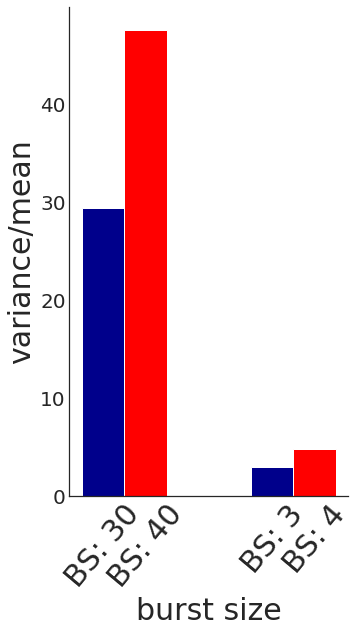

In [31]:
TF_and_target_ds_vals = []
for col in ['total_TF_mRNA', 'total_Target_mRNA']:
    ds_vals = []
    for ds_frac in [1, 0.1]:
        temp_ds = ds_frac*updated_df[col]
        fano_fac = np.var(temp_ds)/np.mean(temp_ds)
        ds_vals.append(fano_fac)
    TF_and_target_ds_vals.append(ds_vals)

#bar positioning
barWidth = 0.25
bars1 = TF_and_target_ds_vals[0]
bars2 = TF_and_target_ds_vals[1]
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

f2D = plt.figure(figsize=((5,9)))
plt.bar(r1, bars1, color='darkblue', width=barWidth, edgecolor='white', label='TF mRNA')
plt.bar(r2, bars2, color='red', width=barWidth, edgecolor='white', label='Target mRNA')

plt.xlabel('burst size', fontsize=30)
plt.ylabel("variance/mean", fontsize=30)
plt.xticks([0,0.25,1,1.25],['BS: 30','BS: 40','BS: 3','BS: 4'],rotation=50,fontsize=30)
sns.despine()
plt.show()

### Fig 2E (mean mRNA and protein for TF and Target for cells that DID vs DIDNT have TF bursting at t=0)

In [22]:
df_use_burstsplit = updated_df

In [24]:
#tracking median across cells that DID vs DID NOT have a burst at t=0 (fig 1D)
t0 = df_use_burstsplit[df_use_burstsplit['sampling_time']==0]

cells_with_burst = list(t0[t0['TF_is_bursting']==True]['Unnamed: 0'])
cells_without_burst_all = list(set(t0['Unnamed: 0']) - set(cells_with_burst))
cells_without_burst = cells_without_burst_all

burst_cells_all_times = []
for j in range(0,40):
    for i in cells_with_burst:
        burst_cells_all_times.extend([int(i+j*20e3)])
        
nonburst_cells_all_times = []
for j in range(0,40):
    for i in cells_without_burst:
        nonburst_cells_all_times.extend([int(i+j*20e3)])
        
print(len(burst_cells_all_times), len(nonburst_cells_all_times))

bursted_cells_info = df_use_burstsplit.loc[burst_cells_all_times,['TF_is_bursting','Target_is_bursting',
                           'total_TF_mRNA','TF_protein_1K','total_Target_mRNA','unspliced_Target','sampling_time']]

nonbursted_cells_info = df_use_burstsplit.loc[nonburst_cells_all_times,['TF_is_bursting','Target_is_bursting',
                           'total_TF_mRNA','TF_protein_1K','total_Target_mRNA','unspliced_Target','sampling_time']]

28600 771400


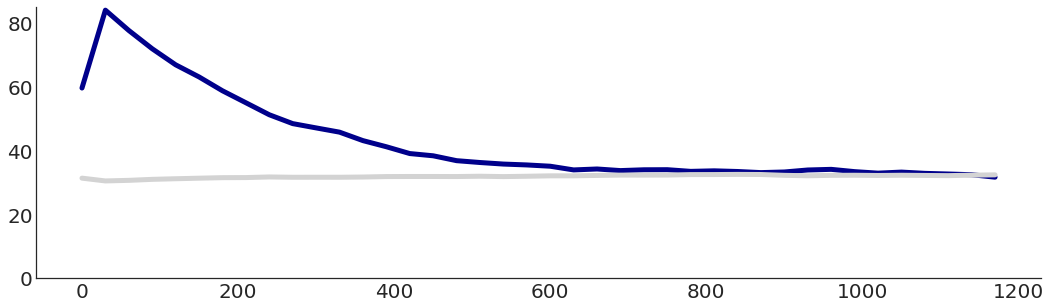

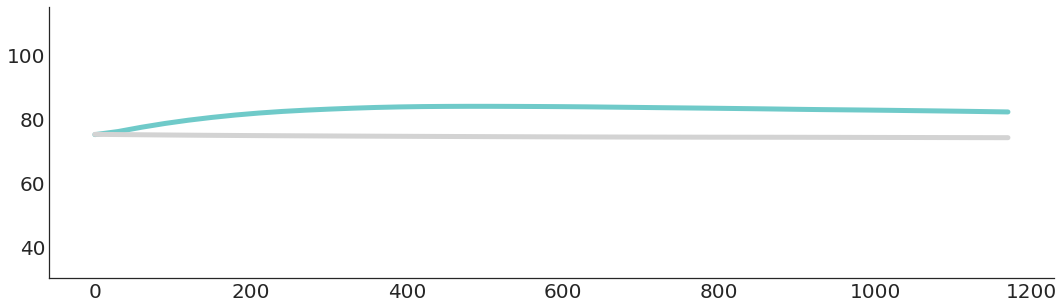

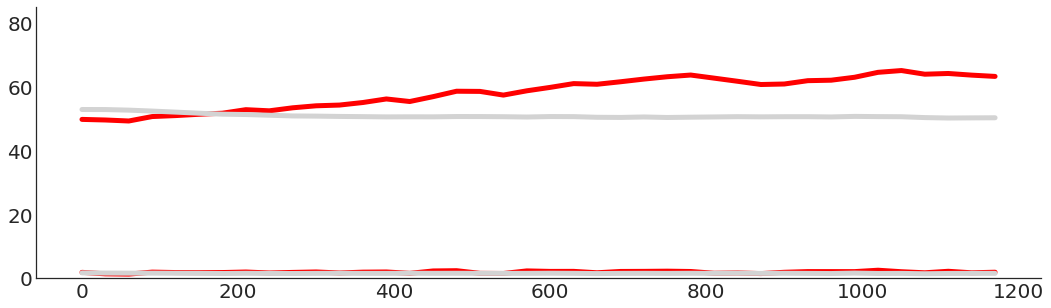

In [34]:
#TF MRNA
plt.figure(figsize=(18,5))
plt.plot(bursted_cells_info.groupby('sampling_time')['total_TF_mRNA'].mean(),color='darkblue',linewidth=5,label='had burst at t=0')
plt.plot(nonbursted_cells_info.groupby('sampling_time')['total_TF_mRNA'].mean(),color='lightgrey',linewidth=5,label='no burst at t=0')

plt.legend(fontsize=25)
plt.ylabel("# TF mRNA transcripts")
plt.xlabel("time after burst (hrs)")
plt.ylim(0,85)
plt.xticks(ticks=np.arange(0,1300,300),labels=np.arange(0,20,5),fontsize=25)
sns.despine()
plt.show()

#TF PROTEIN
plt.figure(figsize=(18,5))
plt.plot(bursted_cells_info.groupby('sampling_time')['TF_protein_1K'].mean(),color='#6FCAC9',linewidth=5,label='had burst at t=0')
plt.plot(nonbursted_cells_info.groupby('sampling_time')['TF_protein_1K'].mean(),color='lightgrey',linewidth=5,label='no burst at t=0')

plt.legend(fontsize=25)
plt.ylabel("# TF protein molecules (1k)")
plt.ylim(30,115)
plt.xticks(ticks=np.arange(0,1300,300),labels=np.arange(0,20,5),fontsize=25)
plt.xlabel("time after burst (hrs)")
sns.despine()
plt.show()

#TARGET MRNA
plt.figure(figsize=(18,5))
plt.plot(bursted_cells_info.groupby('sampling_time')['total_Target_mRNA'].mean(),color='red',linewidth=5,label='had burst at t=0')
plt.plot(nonbursted_cells_info.groupby('sampling_time')['total_Target_mRNA'].mean(),color='lightgrey',linewidth=5,label='no burst at t=0')

plt.plot(bursted_cells_info.groupby('sampling_time')['unspliced_Target'].mean(),color='red',linewidth=5,label='had burst at t=0')
plt.plot(nonbursted_cells_info.groupby('sampling_time')['unspliced_Target'].mean(),color='lightgrey',linewidth=5,label='no burst at t=0')


plt.legend(fontsize=25)
plt.ylabel("# Target mRNA transcripts")
plt.ylim(0,85)
plt.xticks(ticks=np.arange(0,1300,300),labels=np.arange(0,20,5),fontsize=25)
plt.xlabel("time after burst (hrs)",fontsize=22)
sns.despine()
plt.show()

## Figure 3

### Fig 3B (joint mRNA & protein distributions)

In [44]:
#JOINT DISTRIBUTIONS & CORRELATIONS

pulse_length = 60

def joint_distribs(a):
    end, start = list(a[a['sampling_time']==pulse_length]['mRNA_ever_produced_TF']), list(a[a['sampling_time']==0]['mRNA_ever_produced_TF'])
    new_during_pulse = [end[i]-start[i] for i in range(len(end))]

    tot_mRNA_prot_corrs, new_mRNA_prot_corrs = [], []
    mRNA_autocorrs, prot_autocorrs = [], []

    for tp in np.arange(0,1440,30):
        #TF mRNA:protein correlations (total, ∆)
        tot_TF_mRNA = a[a['sampling_time']==0]['total_TF_mRNA']
        tot_TF_prot = a[a['sampling_time']==tp]['TF_protein_1K']
        
        tot_mRNA_prot_corr = spearmanr(tot_TF_mRNA, tot_TF_prot)
        new_mRNA_prot_corr = spearmanr(new_during_pulse, tot_TF_prot)

        #autocorrelations (TF mRNA:TF mRNA over time & TF protein:TF protein over time)
        mRNA_autocorr = spearmanr(a[a['sampling_time']==tp]['total_TF_mRNA'],tot_TF_mRNA)
        prot_autocorr = spearmanr(a[a['sampling_time']==tp]['TF_protein_1K'],a[a['sampling_time']==0]['TF_protein_1K'])

        tot_mRNA_prot_corrs.append(tot_mRNA_prot_corr[0])
        new_mRNA_prot_corrs.append(new_mRNA_prot_corr[0])
        mRNA_autocorrs.append(mRNA_autocorr[0])
        prot_autocorrs.append(prot_autocorr[0])   
        
        if tp==420:
            plt.figure(figsize=(8,8))
            corr = spearmanr(tot_TF_mRNA, tot_TF_prot)[0]
            sns.jointplot(tot_TF_mRNA, tot_TF_prot, color='#6F63AC',alpha=0.5)
            sns.despine()
            plt.show()
    
    return tot_mRNA_prot_corrs, new_mRNA_prot_corrs, mRNA_autocorrs, prot_autocorrs

<Figure size 576x576 with 0 Axes>

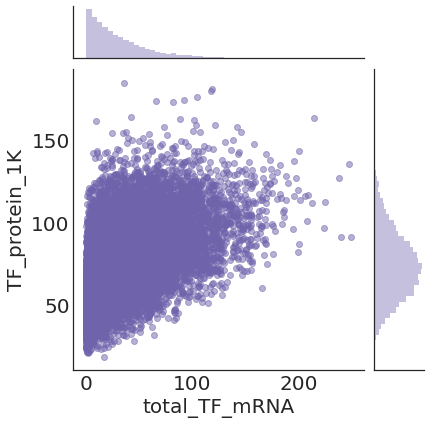

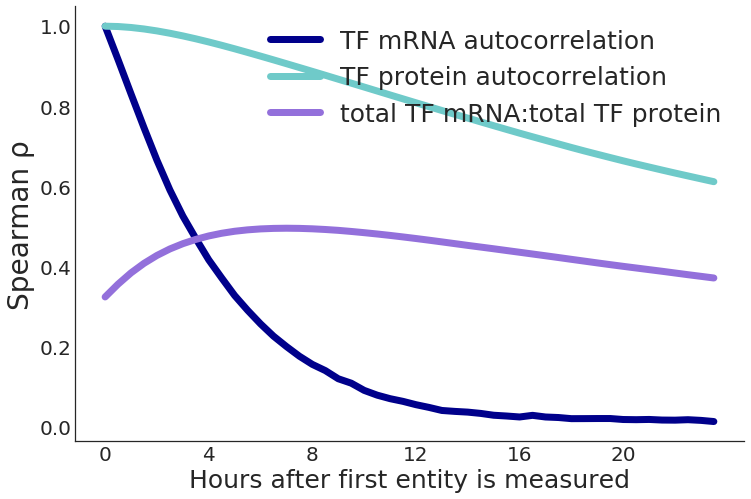

No handles with labels found to put in legend.


Text(0.5, 0, 'Hours after first entity is measured')

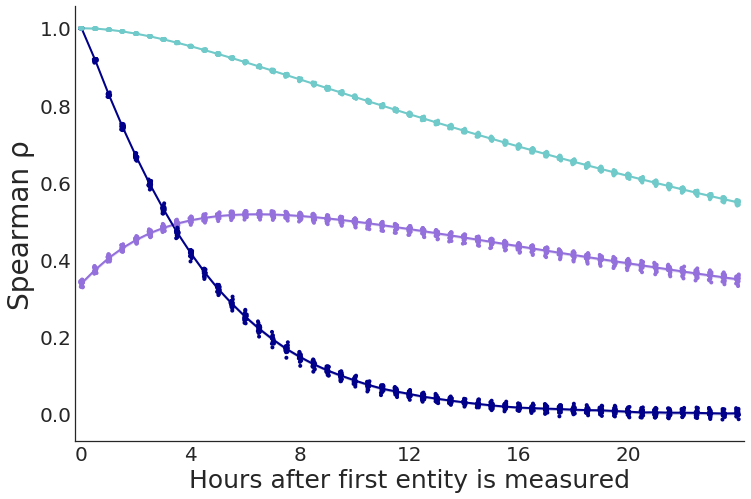

In [39]:
#ONE RUN
tot_mRNA_prot, new_mRNA_prot, mRNA_auto, prot_auto = joint_distribs(updated_df)

plt.figure(figsize=(12,8))
plt.plot(mRNA_auto, label = 'TF mRNA autocorrelation',color='darkblue',linewidth=7)
plt.plot(prot_auto, label = 'TF protein autocorrelation',color='#6FCAC9',linewidth=7)
plt.plot(tot_mRNA_prot, label = 'total TF mRNA:total TF protein',color='mediumpurple',linewidth=7)
plt.xticks(np.arange(0,48,8),np.arange(0,24,4))
sns.despine()
plt.legend(fontsize=25)
plt.ylabel("Spearman ρ",fontsize=28)
plt.xlabel("Hours after first entity is measured",fontsize=25)
plt.show()

#MANY (25) RUNS
# for each corr type, create lineplot
corr_names = ['TF_mRNA:protein','RNA:RNA','protein:protein','TF_total_t0:Target_total_tN','TF_total_t0:Target_nascent_tN','Target_total_t0:TF_total_tN','Target_total_t0:TF_nascent_tN']
    
all_runs_df = pd.DataFrame()
run_nums=[]
for sim_run in range(0,25):
    filename = 'simulated_data_for_figures/fig2_and_3_medians/medians_many_runs/spearman_over_time_run'+str(sim_run)+'.csv'
    this_run_corrs_df = pd.DataFrame(pd.read_csv(filename))
    
    all_runs_df = pd.concat([all_runs_df, this_run_corrs_df])
    run_nums.extend([sim_run]*len(this_run_corrs_df))
    
all_runs_df['run_num'] = run_nums
all_runs_df['timepoint']=[int(i/30) for i in all_runs_df['timepoint']]
    
f = plt.figure(figsize=(12,8))
sns.lineplot(data=all_runs_df,x='timepoint',y='TF_mRNA:protein',color='mediumpurple', ci=95,lw=2)#, err_style='bars')
sns.lineplot(data=all_runs_df,x='timepoint',y='RNA:RNA',color='darkblue', ci=95,lw=2)#, err_style='bars')
sns.lineplot(data=all_runs_df,x='timepoint',y='protein:protein',color='#6FCAC9', ci=95,lw=2)#,err_style='bars')

sns.stripplot(data=all_runs_df,x='timepoint',y='TF_mRNA:protein',color='mediumpurple',s=4)
sns.stripplot(data=all_runs_df,x='timepoint',y='RNA:RNA',color='darkblue',s=4)
sns.stripplot(data=all_runs_df,x='timepoint',y='protein:protein',color='#6fcac9',s=4)
plt.xticks(np.arange(0,48,8),np.arange(0,24,4))
sns.despine()
plt.legend(fontsize=25)
plt.ylabel("Spearman ρ",fontsize=28)
plt.xlabel("Hours after first entity is measured",fontsize=25)

### Fig 3C-E (violin plots showing ratio of means and Spearman rho's)

In [32]:
#https://stackoverflow.com/questions/41567205/outer-lines-seaborn-violinplot-boxplot
from matplotlib.collections import PolyCollection

def patch_violinplot(color):
    ax = plt.gca()
    for art in ax.get_children():
        if isinstance(art, PolyCollection):
            art.set_edgecolor(color)

In [63]:
##Distributions of X conditional on the deciles of Y, where: 
##• X is: TF protein or Target mRNA (unspliced or total) at time t≥0
##• Y is total TF RNA at time zero.

df_to_use = updated_df.copy()
updated_df_t0 = df_to_use[df_to_use['sampling_time']==0]

indep_var_name = 'total_TF_mRNA'#'total_TF_mRNA'#'TF_protein_1K'#'total_TF_mRNA'#'total_TF_mRNA' #'TF_protein_1K'#
indep_var = indep_var_name + ' decile'

num_bins = 10
updated_df_t0[indep_var] = pd.qcut(updated_df_t0[indep_var_name].rank(method='first'),num_bins,labels=False)
df_to_use[indep_var] = list(updated_df_t0[indep_var])*len(set(df_to_use['sampling_time']))

#back-to-back violin plots, for top and bottom deciles
updated_df_sub = df_to_use[df_to_use[indep_var].isin([0,num_bins-1])]
tp_check = [60 + i for i in [0,60*3.5,60*7,60*10.5,60*14]]
updated_df_sub = updated_df_sub[updated_df_sub['sampling_time'].isin(tp_check)]

dep_var = 'TF_protein_1K'#'unspliced_Target'#'unlabeled_Target'#'unspliced_Target'#'total_Target_mRNA'#'TF_protein_1K'#"k_on_Target_adjusted"
color_use = '#c2131d'#'#c2131d'#'#6fcac9'

fig3 = plt.figure(figsize=((12,8)))
ax = sns.violinplot(x="sampling_time", y=dep_var, hue=indep_var, 
                    data=updated_df_sub, color=color_use, split=True, 
                    linewidth=0.5,width=1,inner=None,scale='area',cut=0,gridsize=500)#,bw='silverman')#'quartile')#,palette="Blues")

patch_violinplot(color_use)
# ax.set_xticklabels(['0','3.5','7','10.5','14'],fontsize=25)
plt.yticks(fontsize=25)
plt.xticks(fontsize=28)
plt.xlabel("")#("sampling time (hr)",fontsize=25)
plt.ylabel("")
legend=ax.legend()
legend.remove()
# sns.stripplot(x="sampling_time", y=dep_var, hue=indep_var, data=updated_df_sub, dodge=True, palette='Reds')

ratios=[]
for tp_i in range(len(tp_check)):
    tp = tp_check[tp_i]
    means, distribs = [], []
    tp_data = updated_df_sub[updated_df_sub['sampling_time']==tp]
    for i in [0,num_bins-1]:
        data = tp_data[tp_data[indep_var]==i][dep_var]
        means.append(np.mean(data))
        distribs.append(data)
        if i==0:
            plt.plot([tp_i-.5,tp_i],[np.mean(data),np.mean(data)],
                     color=color_use,linewidth=4)
        if i==num_bins-1:
            plt.plot([tp_i,tp_i+.4],[np.mean(data),np.mean(data)],
                     color='white',linewidth=4)
    ratios.append(means[1]/means[0])
    
corrs=[]
for tp in np.arange(0,60*14,30):
    #Spearman R
    corr, pval=spearmanr(updated_df_t0[indep_var_name], df_to_use[df_to_use['sampling_time']==tp][dep_var])
    corrs.append(corr)

print(corrs)
print(ratios)
sns.despine()
plt.show()

/PHShome/ag179/anaconda3/envs/env2/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


[0.3234081963099148, 0.3554608784606357, 0.38363717896573973, 0.40735202065466203, 0.4271342874758172, 0.44338430754002595, 0.4565304439754336, 0.4672121569957505, 0.47586134621838166, 0.48253505152022974, 0.4875650205311818, 0.49108947640585743, 0.49343541912413136, 0.4947150598928036, 0.4951421934964459, 0.49475949472667247, 0.4936884499098081, 0.4919842447435003, 0.48983777599625994, 0.4870964980784287, 0.48404279203126194, 0.4807505366949572, 0.4772054731519764, 0.47338287703275334, 0.46942809387442674, 0.46527780276532726, 0.4609956116061251, 0.4566254764156878]
[1.4798627434018738, 1.6289684393152395, 1.6408033513506683, 1.6046226981266711, 1.5555803271906645]


### Fig S2C (total:total versus total:nascent)

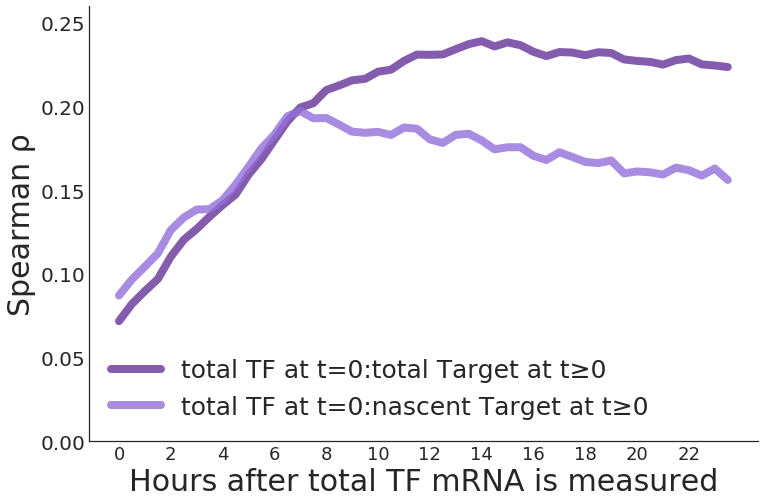

In [51]:
#plotting TF(RNA):Target(RNA) SpearmanR over time

plt.figure(figsize=(12,8))
tot_TF_total_Target_corrs, new_TF_new_Target_corrs, tot_TF_new_Target_corrs = [],[],[]
tot_Target_new_TF_corrs=[] #for role reversal

tot_same_tp = []

for tp in np.arange(0,30*48,30):
    tot_TF_mRNA_t0 = df_to_use[df_to_use['sampling_time']==0]['total_TF_mRNA']
    new_TF_mRNA_t0 = df_to_use[df_to_use['sampling_time']==0]['unspliced_TF']
    tot_Target_mRNA_t0 = df_to_use[df_to_use['sampling_time']==0]['total_Target_mRNA']
    
    tot_TF_total_Target_corrs.append(spearmanr(tot_TF_mRNA_t0, 
                                               df_to_use[df_to_use['sampling_time']==tp]['total_Target_mRNA'])[0])
    new_TF_new_Target_corrs.append(spearmanr(new_TF_mRNA_t0, 
                                             df_to_use[df_to_use['sampling_time']==tp]['unspliced_Target'])[0])
    tot_TF_new_Target_corrs.append(spearmanr(tot_TF_mRNA_t0, 
                                             df_to_use[df_to_use['sampling_time']==tp]['unspliced_Target'])[0])
    
    tot_Target_new_TF_corrs.append(spearmanr(tot_Target_mRNA_t0,
                                              df_to_use[df_to_use['sampling_time']==tp]['unspliced_TF'])[0])
    
    tot_same_tp.append(spearmanr(df_to_use[df_to_use['sampling_time']==tp]['total_TF_mRNA'],
                                df_to_use[df_to_use['sampling_time']==tp]['total_Target_mRNA'])[0])
    
plt.plot(tot_TF_total_Target_corrs, label = 'total TF at t=0:total Target at t≥0',color='rebeccapurple',linewidth=8,alpha=0.8)
plt.plot(tot_TF_new_Target_corrs, label = 'total TF at t=0:nascent Target at t≥0',color='mediumpurple',linewidth=8,alpha=0.8)

plt.xticks(np.arange(0,48,4),np.arange(0,24,2),fontsize=18)
plt.ylim(0,0.26)
plt.legend(fontsize=25)
plt.ylabel("Spearman ρ",fontsize=30)
plt.xlabel("Hours after total TF mRNA is measured",fontsize=30)
sns.despine()

### Fig S2E (fold-change, varying parameters)

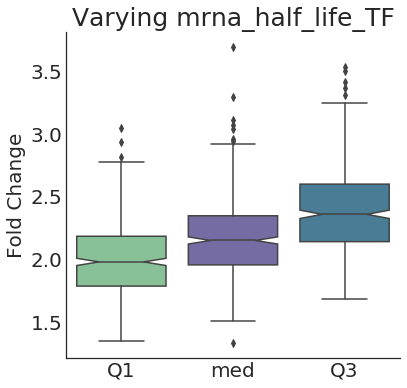

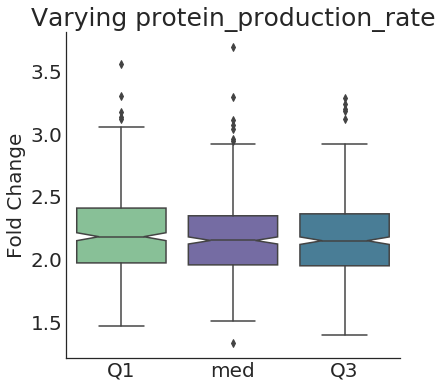

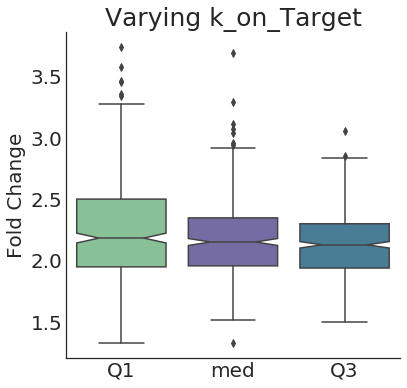

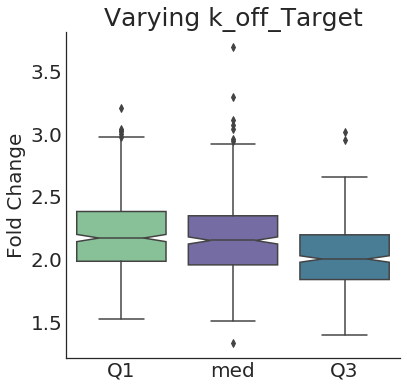

In [42]:
# k off file Q1 and Q3 have been swapped to reflect burst durations instead!

for param in ["protein_half_life", "mrna_half_life_TF", "protein_production_rate",
              "k_on_TF", "k_off_TF", "burst_size_TF", "burst_size_Target", "k_on_Target",
              "k_off_Target", "mrna_half_life_Target"]:

    all_quartiles_df = pd.DataFrame()
    for quartile in ['Q1','med','Q3']:
        
        param_df = pd.read_csv("simulated_data_for_figures/fig4_burstparams/10k_cells_"+param+"_"+quartile+"_ES_over_time.csv")
        num_timepoints = len(set(param_df['timepoint']))
        sim_runs = []
        for i in range(10):
            sim_runs.extend([i]*num_timepoints)
        param_df['sim_run'] = sim_runs
        param_df['quartile'] = [quartile]*len(param_df)
         t
        all_quartiles_df = pd.concat([all_quartiles_df, param_df])

    plt.figure(figsize=(6,6))
    sns.boxplot(data=all_quartiles_df,x='quartile',
                y='Estimated Effect Size', 
                palette=['#7FC993','#6F63AC','#3C81A3'],notch=True)
    plt.ylabel("Fold Change")
    plt.xlabel("")
    sns.despine()
    plt.title("Varying "+param)
    plt.show()

### Fig S2F (Spearman rho's, varying parameters)

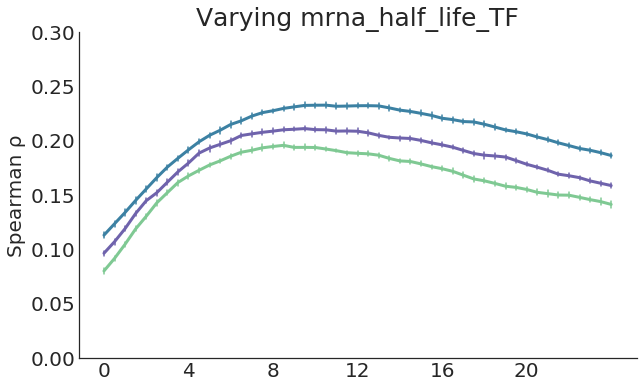

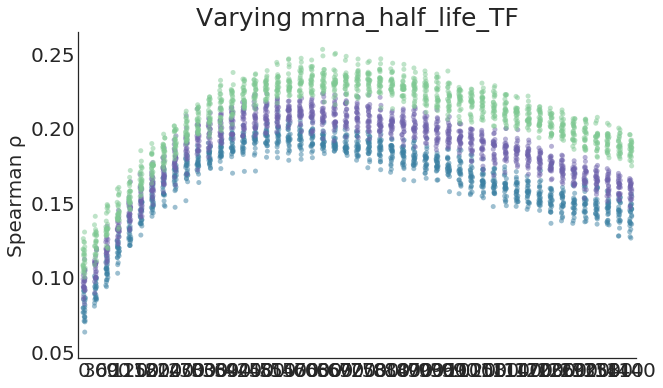

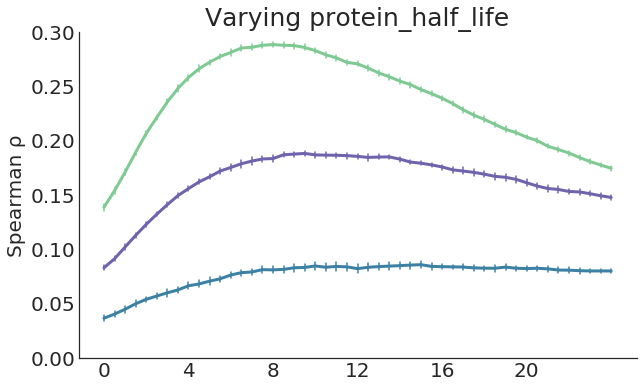

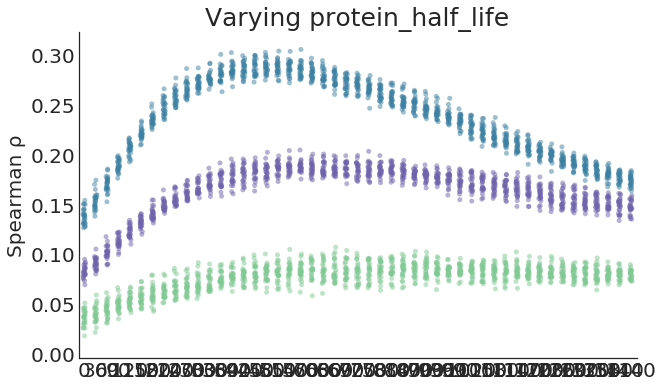

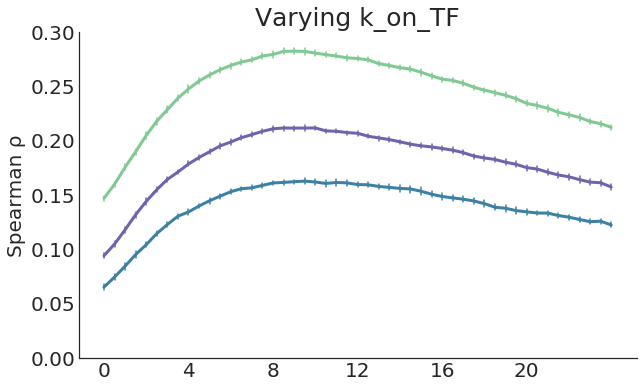

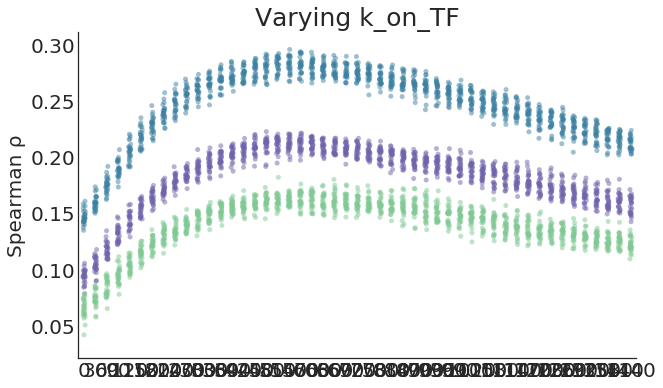

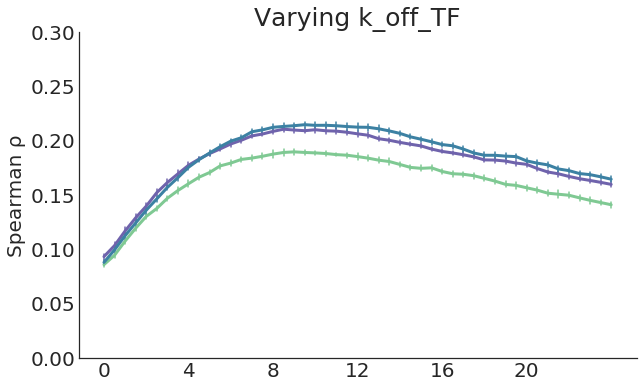

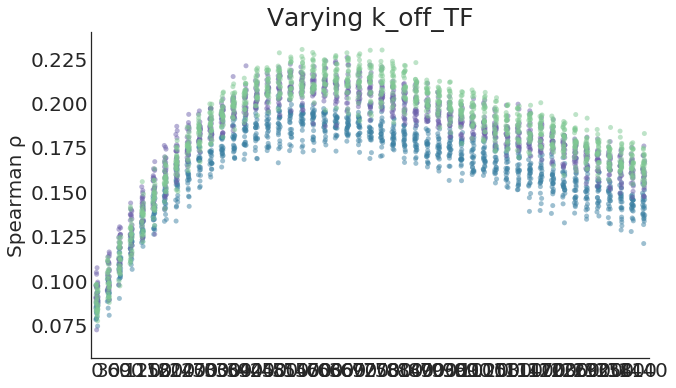

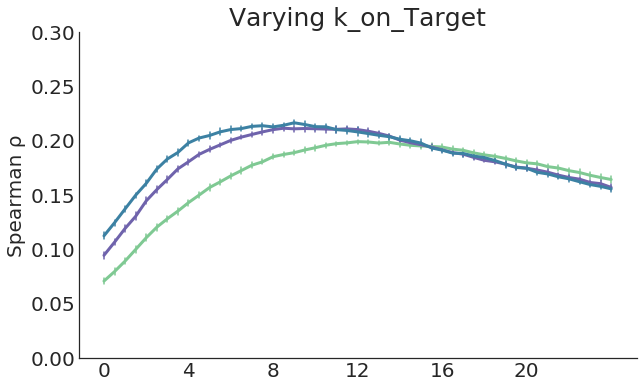

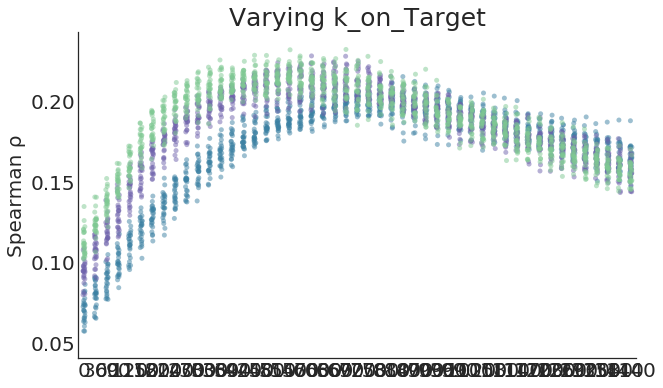

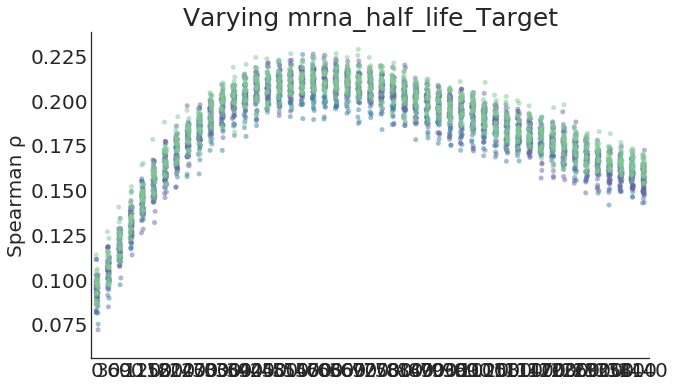

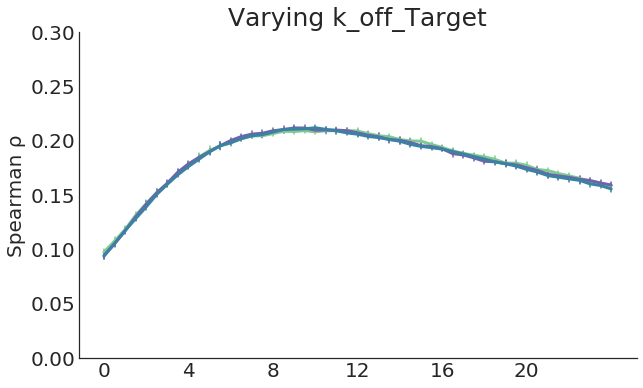

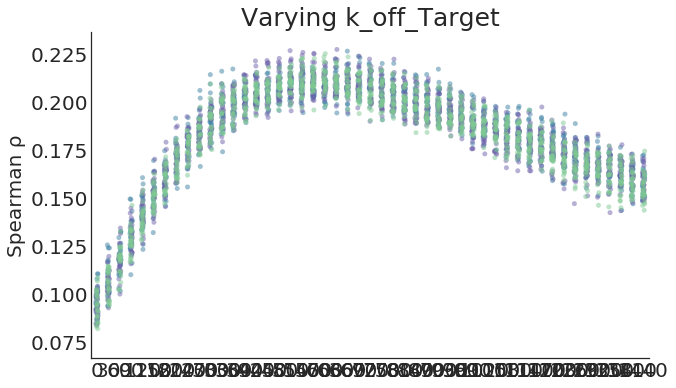

TF_total_t0:Target_total_tN  TF_total_t0:Target_nascent_tN  timepoint  \
0                        0.082092                       0.087137          0   
1                        0.090238                       0.094287         30   
2                        0.103340                       0.109971         60   
3                        0.118074                       0.130111         90   
4                        0.129674                       0.141562        120   
...                           ...                            ...        ...   
1220                     0.233086                       0.158642       1320   
1221                     0.234309                       0.163065       1350   
1222                     0.233969                       0.167540       1380   
1223                     0.233123                       0.157050       1410   
1224                     0.230999                       0.153645       1440   

      sim_run quartile  
0           0       Q1  
1           0       Q1  
2           0       Q1  
3           0       Q1  
4           0       Q1  
...       ...      ...  
1220       24       Q3  
1221       24       Q3  
1222       24       Q3  
1223       24       Q3  
1224       24       Q3  

[3675 rows x 5 columns]

In [138]:
# k off file Q1 and Q3 have been swapped to reflect burst durations instead!

for param in ["mrna_half_life_TF", "protein_half_life", 
              "k_on_TF", "k_off_TF", "k_on_Target", "mrna_half_life_Target","k_off_Target"]:

    all_quartiles_df = pd.DataFrame()
    max_vals, max_ids = [],[]
    for quartile in ['Q1','med','Q3']:
        param_df = pd.read_csv("simulated_data_for_figures/fig4_burstparams/20k_cells_"+param+"_"+quartile+"_Spearman_over_time.csv")
        num_timepoints = len(set(param_df['timepoint']))
        sim_runs = []
        for i in range(25):
            sim_runs.extend([i]*num_timepoints)
        param_df['sim_run'] = [int(i) for i in sim_runs]
        param_df['quartile'] = [quartile]*len(param_df)
        
        cols_keep = ['TF_total_t0:Target_total_tN','TF_total_t0:Target_nascent_tN','timepoint','sim_run','quartile']
        param_df = param_df[cols_keep]
        
        max_vals.append(np.max(param_df['TF_total_t0:Target_nascent_tN'])) #param_df.groupby('timepoint').mean()['TF_total_t0:Target_nascent_tN']))#
        max_ids.append(np.argmax(param_df['TF_total_t0:Target_nascent_tN'])) #param_df.groupby('timepoint').mean()['TF_total_t0:Target_nascent_tN']))#
        
        all_quartiles_df = pd.concat([all_quartiles_df, param_df])
    
    f4line_params = plt.figure(figsize=(10,6))
    ax1 = sns.lineplot(data=all_quartiles_df,
                 x='timepoint',
                 y='TF_total_t0:Target_nascent_tN', hue='quartile',
                 palette=['#7fc993','#6f63ac','#3c81a3'],linewidth=3,err_style='bars')

    legend1=ax1.legend()
    legend1.remove()
    plt.xticks(np.arange(0,1440,240),np.arange(0,24,4))
    plt.ylabel("Spearman ρ")
    plt.xlabel("")
    sns.despine()
    plt.ylim(0,0.3)
    plt.title("Varying "+param)
    plt.show()
    
    f4jitter_params = plt.figure(figsize=(10,6))
    ax2 = sns.stripplot(data=all_quartiles_df,x='timepoint',y='TF_total_t0:Target_nascent_tN',
                  hue='quartile',palette=['#3c81a3','#6f63ac','#7fc993'],alpha=0.5)
    legend2=ax2.legend()
    legend2.remove()
    plt.ylabel("Spearman ρ")
    plt.xlabel("")
    sns.despine()
    plt.title("Varying "+param)
    plt.show()

all_quartiles_df

### Fig 3F & S3A (technical inefficiencies: downsampling # cells and capture efficiency)

one more CE+CN pair
one more CE+CN pair
one more CE+CN pair
one more CE+CN pair
one more CE+CN pair
one more CE+CN pair
one more CE+CN pair
one more CE+CN pair
one more CE+CN pair
one more CE+CN pair
one more CE+CN pair
one more CE+CN pair
one more CE+CN pair
one more CE+CN pair
one more CE+CN pair
one more CE+CN pair
one more CE+CN pair
one more CE+CN pair
one more CE+CN pair
one more CE+CN pair
one more CE+CN pair
one more CE+CN pair
one more CE+CN pair
one more CE+CN pair
one more CE+CN pair
one more CE+CN pair
one more CE+CN pair
one more CE+CN pair
one more CE+CN pair
one more CE+CN pair
one more CE+CN pair
one more CE+CN pair
one more CE+CN pair
one more CE+CN pair
one more CE+CN pair
one more CE+CN pair
one more CE+CN pair
one more CE+CN pair
one more CE+CN pair
one more CE+CN pair
one more CE+CN pair
one more CE+CN pair
one more CE+CN pair
one more CE+CN pair
one more CE+CN pair
one more CE+CN pair
one more CE+CN pair
one more CE+CN pair
one more CE+CN pair
one more CE+CN pair


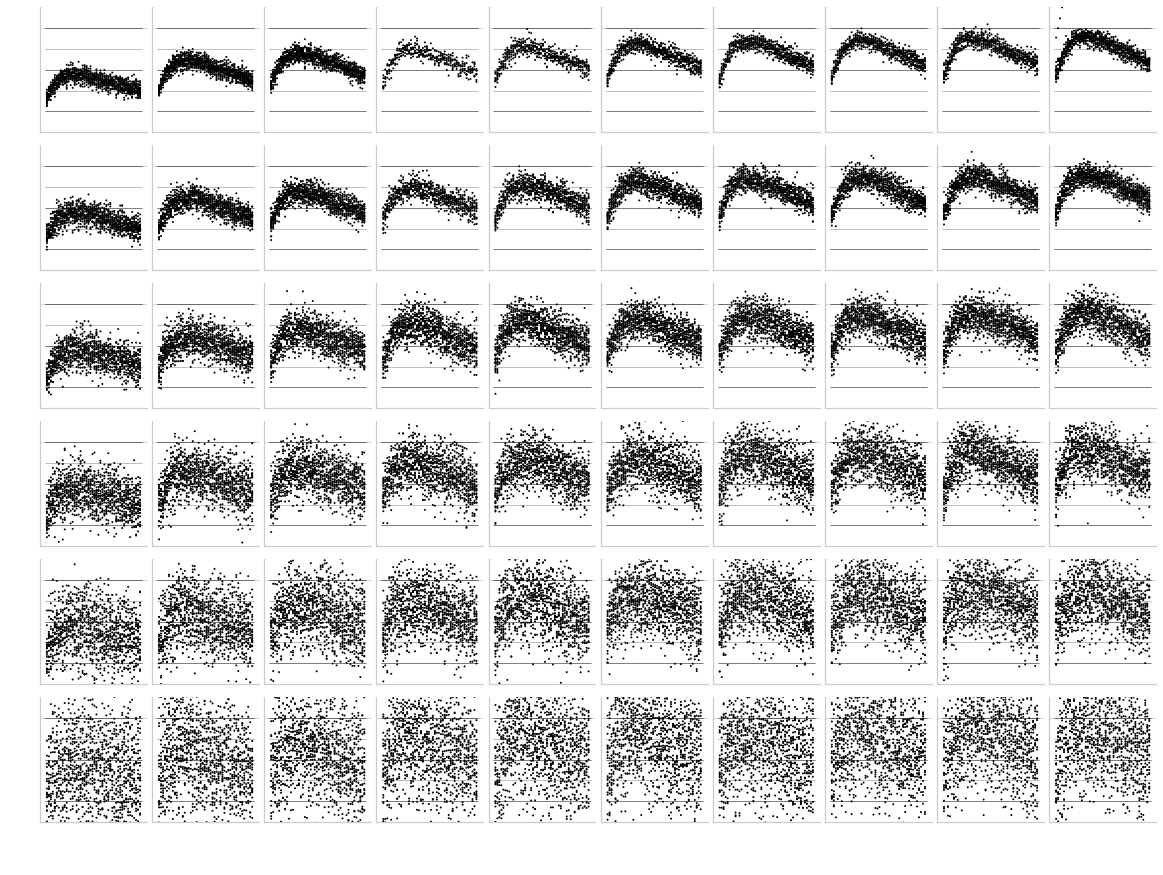

In [10]:
## read in downsampling files, each corresponding to corrs for varying:

# capture efficiencies
# number of cells
# simulation run # for each ^ combo
capture_efficiency = ['10', '20', '30', '40', '50', '60', '70', '80', '90', '100'] #rows
num_cells = ['50k', '25k', '10k', '5k', '2.5k', '1k'] #columns

plt.figure(figsize=(20,15))

i=1
num_rows, num_cols = len(num_cells), len(capture_efficiency)
for NC_i in range(num_rows):
    for CE_i in range(num_cols):
        NC = num_cells[NC_i]
        CE = capture_efficiency[-num_cols:][CE_i]
        
        pair_df = pd.DataFrame()
        simruns=[]
        print('one more CE+CN pair')
        for simrun in range(0,25):
            try:
                fn = 'simulated_data_for_figures/fig4C_downsampling/for_metaplots/CE='+CE+'_NC='+NC+"_corrs_run"+str(simrun)+'.csv.csv'
                these_corrs = pd.DataFrame(pd.read_csv(fn))
                simruns.extend([simrun]*len(these_corrs))
                pair_df = pd.concat([pair_df, these_corrs], axis=0)
                pair_df['sim_run'] = simruns
            except:
                pass
        
        #DEFINING # SUBPLOTS: (1) NUM ROWS (2) NUM COLS (3) INDEX FOR THIS SUBPLOT
        #SOURCE: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html
        ax = plt.subplot(num_rows, num_cols, i)#, frameon=False)
    
        try:
            sns.set_style("whitegrid")
            sns.stripplot(data=pair_df,x='timepoint',y='TF_total_t0:Target_nascent_tN',
                          color='black',size=2,jitter=False) ##6f63ac
            plt.plot(np.arange(0,48,1), list(pair_df.groupby("timepoint").mean()['TF_total_t0:Target_nascent_tN']),
                     color='white')
            plt.xticks(" ")
            plt.yticks(" ")
            plt.ylabel(" ")
            plt.xlabel(" ")
            sns.despine()
    
            #change spacing between subplots
            plt.subplots_adjust(wspace=0.05, hspace=0.1)
        except:
            pass
        
        i+=1

plt.show()

Fig 3F

one more CE+CN pair
one more CE+CN pair
one more CE+CN pair
one more CE+CN pair
one more CE+CN pair
one more CE+CN pair
one more CE+CN pair
one more CE+CN pair
one more CE+CN pair


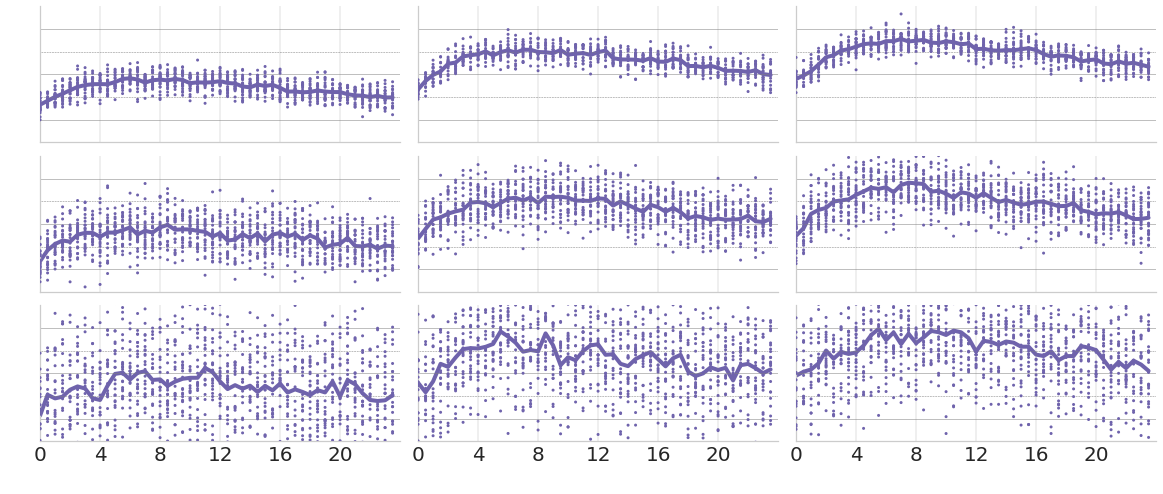

In [9]:
## read in downsampling files, each corresponding to corrs for varying:

# capture efficiencies
# number of cells
# simulation run # for each ^ combo
capture_efficiency = ['10', '50','90'] #rows
num_cells = ['25k', '5k', '1k'] #columns

fig_main_DS = plt.figure(figsize=(20,8))

i=1
num_rows, num_cols = len(num_cells), len(capture_efficiency)
for NC_i in range(num_rows):
    for CE_i in range(num_cols):
        NC = num_cells[NC_i]
        CE = capture_efficiency[-num_cols:][CE_i]
        
        pair_df = pd.DataFrame()
        simruns=[]
        print('one more CE+CN pair')
        for simrun in range(0,25):
            try:
                fn = 'simulated_data_for_figures/fig4C_downsampling/for_metaplots/CE='+CE+'_NC='+NC+"_corrs_run"+str(simrun)+'.csv.csv'
                these_corrs = pd.DataFrame(pd.read_csv(fn))
                simruns.extend([simrun]*len(these_corrs))
                pair_df = pd.concat([pair_df, these_corrs], axis=0)
                pair_df['sim_run'] = simruns
            except:
                pass
        
        #DEFINING # SUBPLOTS: (1) NUM ROWS (2) NUM COLS (3) INDEX FOR THIS SUBPLOT
        #SOURCE: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html
        ax = plt.subplot(num_rows, num_cols, i)#, frameon=False)
    
        try:
            sns.set_style("whitegrid")
            sns.stripplot(data=pair_df,x='timepoint',y='TF_total_t0:Target_nascent_tN',
                          color='#6f63ac',size=3,jitter=False)
            plt.plot(np.arange(0,48,1), list(pair_df.groupby("timepoint").mean()['TF_total_t0:Target_nascent_tN']),
                     color='#6f63ac', linewidth=4)
            if i>num_rows*num_cols-3:
                plt.xticks(np.arange(0,48,8),np.arange(0,24,4))
            else:
                plt.xticks(np.arange(0,48,8), " ")
            plt.yticks(" ")
            plt.ylabel(" ")
            plt.xlabel(" ")
            sns.despine()
            #change spacing between subplots
            plt.subplots_adjust(wspace=0.05, hspace=0.1)
        except:
            pass
        
        i+=1

# plt.xlabel("Time (hours)")
# plt.ylabel("Spearman ρ")
fig_main_DS.savefig("figure_pdfs/3F_downsampling/totalTF_nascentTarget_jitterplot_MAIN.pdf", bbox_inches='tight')
plt.show()

### Fig 3G & S3C (state-based covariation across runs)

In [22]:
#run simulator 2X, with NO link function, and with different basal TF and Target abundances
#(by varying k_on for both TF and Target from Q1 to Q3)
folder = 'simulated_data_for_figures/fig4C_states/many_runs/'

In [29]:
all_state_based_df = pd.DataFrame()

i=0
for Q1_fn, Q3_fn in [("k_on_Q1_STATE_and_REG_samplesOverTime.csv","k_on_Q3_STATE_and_REG_samplesOverTime.csv"),
                     ('k_on_Q1_SAMPLES_OVER_TIME_MANY_SAMPLES.csv','k_on_Q3_SAMPLES_OVER_TIME_MANY_SAMPLES.csv')]:

    ####### READ IN AND UPDATE HIGH + LOW DFS ########
    print('reading in DFs for this version of state-based')
    states_low_df = pd.DataFrame(pd.read_csv(folder+Q1_fn))
    states_high_df = pd.DataFrame(pd.read_csv(folder+Q3_fn))

    states_low_df['state'] = ['low']*len(states_low_df)
    states_low_df['unspliced_Target'] = states_low_df['unspliced_unlabeled_Target']+states_low_df['unspliced_labeled_Target']
    states_low_df['unspliced_TF'] = states_low_df['unspliced_unlabeled_TF']+states_low_df['unspliced_labeled_TF']
    states_low_df['unlabeled_Target'] = states_low_df['unspliced_unlabeled_Target']+states_low_df['spliced_unlabeled_Target']
    states_low_df['labeled_TF'] = states_low_df['unspliced_labeled_TF']+states_low_df['spliced_labeled_TF']
    states_low_df['unlabeled_TF'] = states_low_df['unspliced_unlabeled_TF']+states_low_df['spliced_unlabeled_TF']
    states_low_df['labeled_Target'] = states_low_df['unspliced_labeled_Target']+states_low_df['spliced_labeled_Target']

    states_high_df['state'] = ['high']*len(states_high_df)
    states_high_df['unspliced_Target'] = states_high_df['unspliced_unlabeled_Target']+states_high_df['unspliced_labeled_Target']
    states_high_df['unspliced_TF'] = states_high_df['unspliced_unlabeled_TF']+states_high_df['unspliced_labeled_TF']
    states_high_df['unlabeled_Target'] = states_high_df['unspliced_unlabeled_Target']+states_high_df['spliced_unlabeled_Target']
    states_high_df['labeled_TF'] = states_high_df['unspliced_labeled_TF']+states_high_df['spliced_labeled_TF']
    states_high_df['unlabeled_TF'] = states_high_df['unspliced_unlabeled_TF']+states_high_df['spliced_unlabeled_TF']
    states_high_df['labeled_Target'] = states_high_df['unspliced_labeled_Target']+states_high_df['spliced_labeled_Target']

    ### POISSON DOWNSAMPLE COUNTS ###
    print('downsampling counts')
    DS_FRAC = 0.1
    for col in ['total_TF_mRNA','total_Target_mRNA','labeled_TF','unlabeled_Target',
               'unlabeled_TF','labeled_Target','unspliced_TF','unspliced_Target']:
        states_high_df[col] = poisson_capture(DS_FRAC,states_high_df[col])
        states_low_df[col] = poisson_capture(DS_FRAC,states_low_df[col])

    #############################################
    all_runs_state_corrs_df = pd.DataFrame()
    run_nums=[]
    print('running through sampling runs')
    for sampling_run in range(0,25):
        num_cells_per = 10000
        print('subsetting from high and low DFs, to create 2 "states"')
        low_rand_cells_i_t0 = np.arange(sampling_run*num_cells_per,
                                        sampling_run*num_cells_per+num_cells_per)
        high_rand_cells_i_t0 = np.arange(sampling_run*num_cells_per,
                                         sampling_run*num_cells_per+num_cells_per)

        #track cell indices at all timepoints, ST tracking the same cells as t0
        low_cells_all_tps, high_cells_all_tps = [], []
        for TP in range(0,48): #tps (for 1440 min, w 30 min intervals)
            total_cells_per_tp = 25e4
            low_cells_all_tps.extend(list(low_rand_cells_i_t0+TP*total_cells_per_tp))
            high_cells_all_tps.extend(list(high_rand_cells_i_t0+TP*total_cells_per_tp))
        
        states_low_df_sampled = states_low_df.iloc[low_cells_all_tps,:]
        states_high_df_sampled = states_high_df.iloc[high_cells_all_tps,:]

        print('combining into a joint df')
        #combine cells from high and low states at each timepoint
        joint_states_df = pd.concat([states_low_df_sampled,states_high_df_sampled])

        # FIGURE 5C
        tp_check = sorted(list(set(joint_states_df['sampling_time'])))
        joint_states_df_t0 = joint_states_df[joint_states_df['sampling_time']==0]
        print('calculating corrs over time')
        total_corrs=[]
        new_corrs=[]
        REVERSE_new_corrs=[]
        LU_corrs,LT_corrs,UL_corrs,TL_corrs,TT_corrs=[],[],[],[],[]
        for tp in tp_check:
            tp_data = joint_states_df[joint_states_df['sampling_time']==tp]
            Target_tp_data = tp_data['total_Target_mRNA']
            TF_tp_data = tp_data['total_TF_mRNA']
            new_Target_tp_data = tp_data['unspliced_Target']
            new_TF_tp_data = tp_data['unspliced_TF']
            labeled_TF_data = tp_data['labeled_TF']
            unlabeled_Target_data = tp_data['unlabeled_Target']
            unlabeled_TF_data = tp_data['unlabeled_TF']
            labeled_Target_data = tp_data['labeled_Target']

            total_corrs.append(spearmanr(joint_states_df_t0['total_TF_mRNA'],Target_tp_data)[0])
            new_corrs.append(spearmanr(joint_states_df_t0['total_TF_mRNA'],new_Target_tp_data)[0])
            REVERSE_new_corrs.append(spearmanr(joint_states_df_t0['total_Target_mRNA'],new_TF_tp_data)[0])   

            LU_corrs.append(spearmanr(labeled_TF_data,unlabeled_Target_data)[0])
            LT_corrs.append(spearmanr(labeled_TF_data,Target_tp_data)[0])
            UL_corrs.append(spearmanr(unlabeled_TF_data,labeled_Target_data)[0])
            TL_corrs.append(spearmanr(TF_tp_data,labeled_Target_data)[0])
            TT_corrs.append(spearmanr(TF_tp_data,Target_tp_data)[0])

        sampling_times = tp_check
        if i==1:
            this_run_corrs_df = pd.DataFrame(list(zip(new_corrs, REVERSE_new_corrs, sampling_times)),
                                             columns=['state-new-corrs','state-reverse-corrs','sampling_time'])
        else:
            this_run_corrs_df = pd.DataFrame(list(zip(new_corrs, REVERSE_new_corrs, sampling_times)),
                                             columns=['state-reg-new-corrs','state-reg-reverse-corrs','sampling_time'])

        run_nums.extend([sampling_run]*len(this_run_corrs_df))

        all_runs_state_corrs_df = pd.concat([all_runs_state_corrs_df, this_run_corrs_df])

        all_runs_state_corrs_df['sim_run'] = run_nums

    all_runs_state_corrs_df['sampling_time']=[int(i/30) for i in all_runs_state_corrs_df['sampling_time']]
    all_state_based_df = pd.concat([all_state_based_df, all_runs_state_corrs_df],axis=1)
    i+=1
    
all_state_based_df

In [32]:
# all_state_based_df.to_csv("simulated_data_for_figures/fig4C_states/many_runs/states_combined_downsampled_CORRS_df.csv")
all_state_based_df = pd.DataFrame(pd.read_csv("simulated_data_for_figures/fig4C_states/many_runs/states_combined_downsampled_CORRS_df.csv"))
all_state_based_df

Unnamed: 0  state-reg-new-corrs  state-reg-reverse-corrs  sampling_time  \
0              0             0.111491                 0.078532              0   
1              1             0.090505                 0.065586              1   
2              2             0.095627                 0.076248              2   
3              3             0.105300                 0.087311              3   
4              4             0.113105                 0.066597              4   
...          ...                  ...                      ...            ...   
1195          43             0.110870                 0.063059             43   
1196          44             0.101322                 0.063674             44   
1197          45             0.098074                 0.087869             45   
1198          46             0.112347                 0.082376             46   
1199          47             0.104924                 0.075473             47   

      sim_run  state-new-corrs  state-reverse-corrs  sampling_time.1  \
0           0         0.086562             0.093266                0   
1           0         0.071380             0.089586                1   
2           0         0.071395             0.087098                2   
3           0         0.079008             0.082172                3   
4           0         0.080050             0.084597                4   
...       ...              ...                  ...              ...   
1195       24         0.086256             0.077839               43   
1196       24         0.080303             0.082310               44   
1197       24         0.085939             0.074846               45   
1198       24         0.057617             0.089325               46   
1199       24         0.068845             0.087876               47   

      sim_run.1  
0             0  
1             0  
2             0  
3             0  
4             0  
...         ...  
1195         24  
1196         24  
1197         24  
1198         24  
1199         24  

[1200 rows x 9 columns]

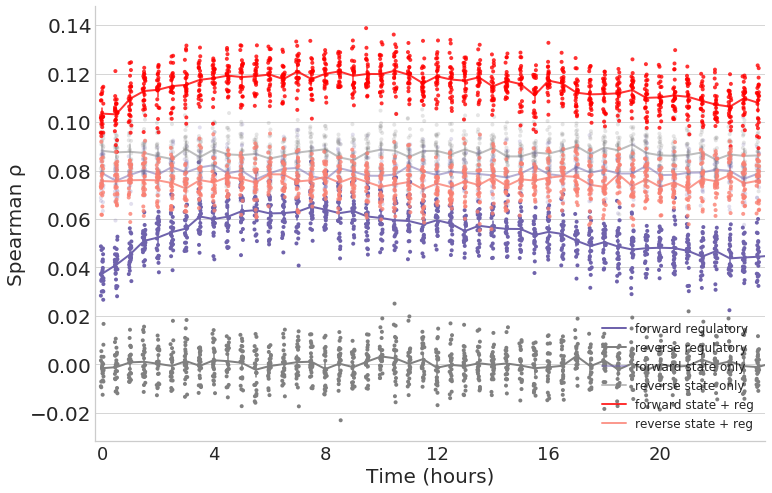

In [50]:
#### REGULATORY IMPORT ####
#get forward and reverse corrs from DOWNSAMPLED counts!! 10% for now
# corr_names = ['TF_mRNA:protein','RNA:RNA','protein:protein','TF_total_t0:Target_total_tN',
#               'TF_total_t0:Target_nascent_tN','Target_total_t0:TF_total_tN','Target_total_t0:TF_nascent_tN']
    
# all_runs_DOWNSAMPLED_df = pd.DataFrame()
# run_nums=[]
# for sim_run in range(0,25):
#     filename = 'simulated_data_for_figures/fig4C_downsampling/old/rhos_capture_eff=0.1_run'+str(sim_run)+'.csv'
#     this_run_corrs_df = pd.DataFrame(pd.read_csv(filename))
    
#     all_runs_DOWNSAMPLED_df = pd.concat([all_runs_DOWNSAMPLED_df, this_run_corrs_df])
#     run_nums.extend([sim_run]*len(this_run_corrs_df))
    
# all_runs_DOWNSAMPLED_df['run_num'] = run_nums
# all_runs_DOWNSAMPLED_df['timepoint']=[int(i/30) for i in all_runs_DOWNSAMPLED_df['timepoint']]

fig4_states = plt.figure(figsize=(12,8))

####### REGULATORY #######
#FORWARD, downsampled
sns.lineplot(data=all_runs_DOWNSAMPLED_df,x='timepoint',y='TF_total_t0:Target_nascent_tN',color='#6f63ac',
             ci=95,lw=2, err_style='bars',label='forward regulatory')
sns.stripplot(data=all_runs_DOWNSAMPLED_df,x='timepoint',y='TF_total_t0:Target_nascent_tN',color='#6f63ac',s=4)

#REVERSE
sns.lineplot(data=all_runs_DOWNSAMPLED_df,x='timepoint',y='Target_total_t0:TF_nascent_tN',color='grey',
             ci=95,lw=2, err_style='bars',label='reverse regulatory')
sns.stripplot(data=all_runs_DOWNSAMPLED_df,x='timepoint',y='Target_total_t0:TF_nascent_tN',color='grey',s=4)

####### STATE-BASED #######
sns.lineplot(data=all_state_based_df,x='sampling_time',y='state-new-corrs',color='#6f63ac',
             ci=95,lw=2,alpha=0.5,dashes=True, err_style='bars',label='forward state only')
sns.lineplot(data=all_state_based_df,x='sampling_time',y='state-reverse-corrs',color='grey',
             ci=95,lw=2,alpha=0.5,dashes=True, err_style='bars',label='reverse state only')
sns.stripplot(data=all_state_based_df,x='sampling_time',y='state-new-corrs',color='#6f63ac',s=4,alpha=0.2)
sns.stripplot(data=all_state_based_df,x='sampling_time',y='state-reverse-corrs',color='grey',s=4,alpha=0.2)

####### STATE-BASED WITH REGULATION ALSO ########
sns.lineplot(data=all_state_based_df,x='sampling_time',y='state-reg-new-corrs',color='red',
             ci=95,lw=2,alpha=.8,dashes=True, err_style='bars',label='forward state + reg')
sns.lineplot(data=all_state_based_df,x='sampling_time',y='state-reg-reverse-corrs',color='salmon',
             ci=95,lw=2,alpha=0.8,dashes=True, err_style='bars',label='reverse state + reg')
sns.stripplot(data=all_state_based_df,x='sampling_time',y='state-reg-new-corrs',color='red',s=4,alpha=0.8)
sns.stripplot(data=all_state_based_df,x='sampling_time',y='state-reg-reverse-corrs',color='salmon',s=4,alpha=0.8)

sns.despine()
plt.legend(fontsize=12,loc='best')
plt.xticks(np.arange(0,48,8),np.arange(0,24,4),fontsize=18)
plt.xlabel("Time (hours)")
plt.ylabel("Spearman ρ")
# fig4_states.savefig("figure_pdfs/4C_downsampled_nascent_REG_and_STATE.pdf", bbox_inches='tight')
plt.show()

### Fig S3B (checks for counts-based 2 cell states)

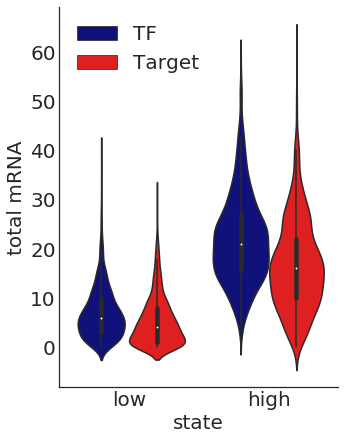

/home/jupyter/.conda/envs/jupyter_env/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


[0.72751335 0.27248665]
[538.35827242 329.47580329]


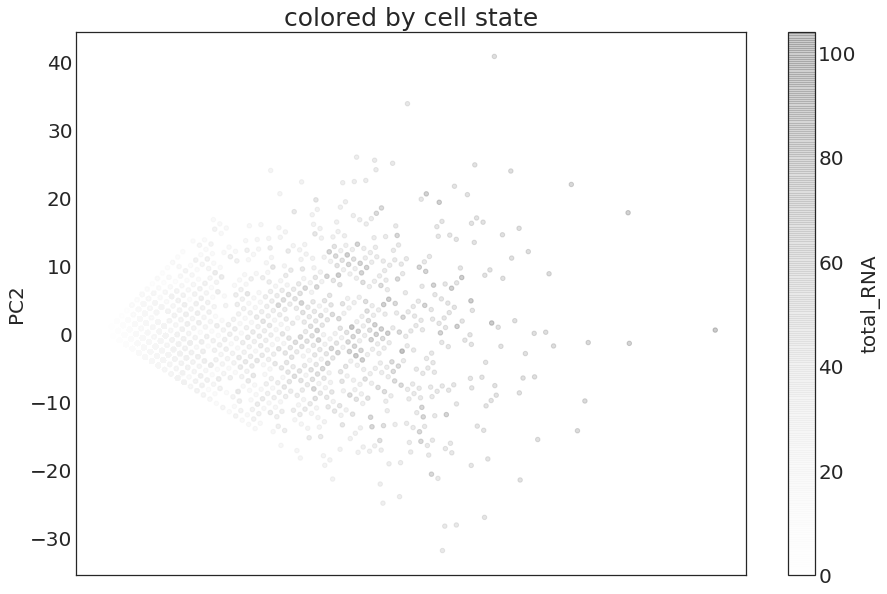

In [97]:
#cell state boxplots
distrib_boxplot_df = pd.DataFrame()
distrib_boxplot_df['total mRNA'] = list(joint_states_df_t0['total_TF_mRNA'])+list(joint_states_df_t0['total_Target_mRNA'])
distrib_boxplot_df['gene'] = ['TF']*len(joint_states_df_t0) + ['Target']*len(joint_states_df_t0)
distrib_boxplot_df['state'] = ['low']*1000 + ['high']*1000 + ['low']*1000 + ['high']*1000
distrib_boxplot_df

plt.figure(figsize=(5,7))
my_pal = {"TF": "darkblue", "Target": "red"}
sns.violinplot(data=distrib_boxplot_df, x='state', hue='gene', y='total mRNA',palette=my_pal)
plt.legend(loc='upper left')
sns.despine()
plt.show()

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
joint_states_df_t0['total_RNA'] = joint_states_df_t0['total_TF_mRNA']+joint_states_df_t0['total_Target_mRNA']
pca.fit(joint_states_df_t0[['total_TF_mRNA','total_Target_mRNA']])
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
to_transform = joint_states_df_t0.copy()
low_D = pca.fit_transform(to_transform[['total_TF_mRNA','total_Target_mRNA']])

low_D_df = pd.DataFrame(np.array(list([low_D[:,0],low_D[:,1],joint_states_df_t0['total_RNA'],
                                      joint_states_df_t0['total_TF_mRNA'],
                                      joint_states_df_t0['total_Target_mRNA'],
                                      joint_states_df_t0['state']])).T,
                       columns=['PC1','PC2','total_RNA','total_TF_mRNA','total_Target_mRNA','state'])

#for coloring by state
state_colors = [0 if state=='low' else 1 for state in low_D_df['state']]
low_D_df['state color'] = state_colors

low_D_df.plot.scatter(x='PC1',y='PC2', c='total_RNA', cmap='Greys', alpha=0.2, s=20)#'total_RNA'#'total_TF_mRNA')
plt.title("colored by cell state")
plt.show()

## Table 1

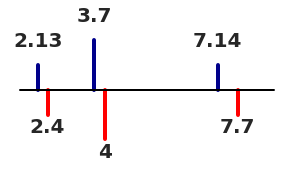

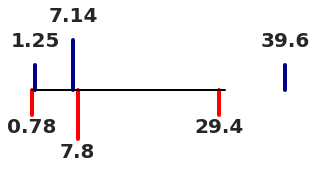

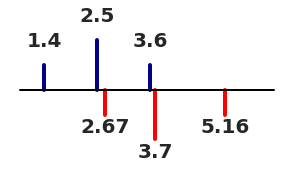

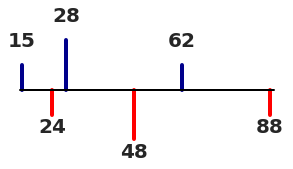

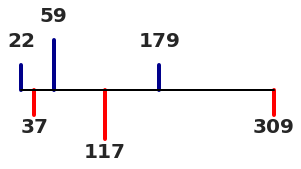

In [165]:
#interquartile ranges for each intrinsic parameter, taken from experiments reported in literature
#(refs cited in the main text)

#time between bursts (1/kon) (hours)
interburst_times = ([2.13, 3.7, 7.14], [2.4, 4, 7.7])

#burst duration (1/koff) (minutes)
burst_durations = ([1.25, 7.14, 39.6], [0.78, 7.8, 29.4])

#mRNA half-life (hours)
mRNA_thalfs = ([1.4, 2.5, 3.6], [2.67, 3.7, 5.16])

#protein half-life (hours)
prot_thalfs = ([15,28,62], [24,48,88])

#burst size
burst_sizes = ([3.2,5.2,9.6], [3.78,6.6,12.2])

#translation rate
translation_rates = ([22,59,179], [37,117,309])

all_intrinsic_params=[interburst_times,burst_durations,
                     mRNA_thalfs,prot_thalfs,burst_sizes,
                     translation_rates]

for TF_vals, nonTF_vals in all_intrinsic_params:
    TF_Q1, TF_med, TF_Q3 = TF_vals
    nonTF_Q1, nonTF_med, nonTF_Q3 = nonTF_vals
    lw = 4
    ms = 5
    fs = 20

    fig1 = plt.figure(figsize=(5,2))
    ax1 = plt.axes(frameon=False)
    ax1.axes.get_xaxis().set_visible(False)
    ax1.axes.get_yaxis().set_visible(False)
    plt.plot([TF_Q1,TF_Q1],[0,1],color='DarkBlue',linewidth=lw)
    plt.plot([TF_med,TF_med],[0,2],color='DarkBlue',linewidth=lw)
    plt.plot([TF_Q3,TF_Q3],[0,1],color='DarkBlue',linewidth=lw)
    plt.plot([nonTF_Q1,nonTF_Q1],[0,-1],color='Red',linewidth=lw)
    plt.plot([nonTF_med,nonTF_med],[0,-2],color='Red',linewidth=lw)
    plt.plot([nonTF_Q3,nonTF_Q3],[0,-1],color='Red',linewidth=lw)
    
    for param_val in [TF_Q1, TF_Q3]:
        plt.text(param_val,1.75,str(param_val),horizontalalignment='center',fontsize=fs,fontweight='bold')
        
    for param_val in [nonTF_Q1, nonTF_Q3]:
        plt.text(param_val,-1.75,str(param_val),horizontalalignment='center',fontsize=fs,fontweight='bold')
        
    plt.text(TF_med,2.75,str(TF_med),horizontalalignment='center',fontsize=fs,fontweight='bold')
    plt.text(nonTF_med,-2.75,str(nonTF_med),horizontalalignment='center',fontsize=fs,fontweight='bold')
    
    plt.plot([TF_Q1-.5,nonTF_Q3+1],[0,0],color='black',linewidth=2)
    sns.despine()
    plt.show()